<a href="https://colab.research.google.com/github/iampratik16/Anomaly-based-network-intrusion-detection-system/blob/main/ANIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and import all of the required libraries like pandas, numpy, matplotlib, etc. along with the drive with data**

In [ ]:
pip install optuna

In [ ]:
import numpy as np #for numerical computing
import pandas as pd #for data manipulation and analysis
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for ploting different graphs for results
from pandas.api.types import is_numeric_dtype #for checking if the data is of numeric type
import warnings #used for handling errors and exceptions
from sklearn import tree #utilized for decision tree classification and regression models
from sklearn.model_selection import train_test_split #used to split the dataset obtained into test and train sets
from sklearn.neighbors import KNeighborsClassifier #used to create the KNN classifier model
from sklearn.linear_model import LogisticRegression #used to create the logistic regression model
from sklearn.preprocessing import StandardScaler, LabelEncoder #these modules were used during the scaling, normalizing and encoding the dataset
from sklearn.tree  import DecisionTreeClassifier #used for creating the Decision tree model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier #this are modules used during the feature selsction process using the random classifier
from sklearn.feature_selection import RFE # used for the feature selection process
import itertools #used for efficient looping and iterations
from xgboost import XGBClassifier #this is a module which helps in boosting the gradient boosting and speeding up the performance
from tabulate import tabulate #for displaying tabular data
import optuna #this is a module that provides us with frameworks that can modify andoptimize the parameters for our advantage
import time# this is a simple module to keep track of time taken by each of the models
from sklearn.metrics import confusion_matrix # module for evaluating the confusion matrix of the models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**PREPROCESSING** the dataset which includes getting an overview of the dataset and performing normalization, Label encoding, feature selection and splitting the dataset into test and train datasets.

In [ ]:
data = pd.read_csv('/content/csv_result-KDDTest+.csv')

In [ ]:
data.head()

,id,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,1,0,tcp,private,REJ,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,2,0,tcp,private,REJ,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,3,2,tcp,ftp_data,SF,12983,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,4,0,icmp,eco_i,SF,20,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,5,1,tcp,telnet,RSTO,0,15,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6798 non-null   int64  
 1   'duration'                     6798 non-null   int64  
 2   'protocol_type'                6798 non-null   object 
 3   'service'                      6798 non-null   object 
 4   'flag'                         6798 non-null   object 
 5   'src_bytes'                    6798 non-null   int64  
 6   'dst_bytes'                    6798 non-null   int64  
 7   'land'                         6798 non-null   int64  
 8   'wrong_fragment'               6798 non-null   int64  
 9   'urgent'                       6798 non-null   int64  
 10  'hot'                          6798 non-null   int64  
 11  'num_failed_logins'            6798 non-null   int64  
 12  'logged_in'                    6798 non-null   i

In [ ]:
data.describe()

,id,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
count,6798.000000,6798.000000,6.798000e+03,6.798000e+03,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,...,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,6797.000000,6797.000000,6797.000000
mean,3399.500000,242.321565,1.520909e+04,1.922517e+03,0.000147,0.007944,0.000441,0.096205,0.020888,0.434540,...,194.693733,139.429244,0.601084,0.090924,0.137033,0.018251,0.097170,0.099637,0.236937,0.229254
std,1962.557897,1530.954828,7.639572e+05,1.896862e+04,0.012129,0.135921,0.021004,0.528026,0.146075,0.495733,...,93.240749,111.878908,0.436504,0.219472,0.312438,0.076040,0.271539,0.282546,0.389111,0.403241
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1700.250000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,124.250000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3399.500000,0.000000,5.300000e+01,4.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,160.000000,0.900000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5098.750000,0.000000,2.890000e+02,5.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.380000,0.190000
max,6798.000000,54451.000000,6.282565e+07,1.171108e+06,1.000000,3.000000,1.000000,22.000000,3.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

id                               0
'duration'                       0
'protocol_type'                  0
'service'                        0
'flag'                           0
'src_bytes'                      0
'dst_bytes'                      0
'land'                           0
'wrong_fragment'                 0
'urgent'                         0
'hot'                            0
'num_failed_logins'              0
'logged_in'                      0
'num_compromised'                0
'root_shell'                     0
'su_attempted'                   0
'num_root'                       0
'num_file_creations'             0
'num_shells'                     0
'num_access_files'               0
'num_outbound_cmds'              0
'is_host_login'                  0
'is_guest_login'                 0
'count'                          0
'srv_count'                      0
'serror_rate'                    0
'srv_serror_rate'                0
'rerror_rate'                    0
'srv_rerror_rate'   

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

id                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [ ]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
column_names = data.columns
print(column_names) # getting familiar with the various fields in the dataset

Index(['id', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


Index(['id', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


<Axes: xlabel='class', ylabel='count'>

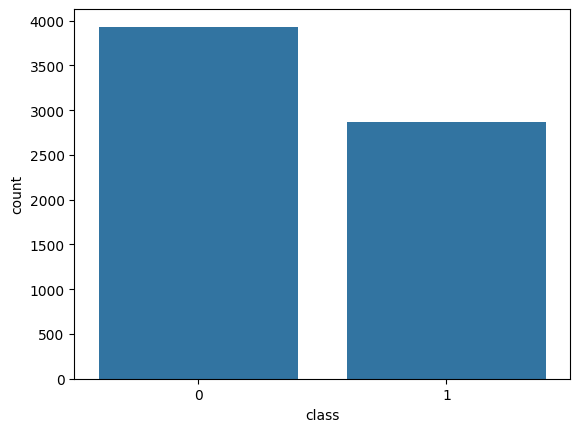

In [ ]:
data.columns = data.columns.str.strip("'")
print(data.columns)
sns.countplot(x=data['class'])

In [ ]:
print('Class distribution Training set:')
print(data['class'].value_counts())

Class distribution Training set:
class
0    3932
1    2865
Name: count, dtype: int64


In [ ]:
#performing label encoding to the datasets
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(data)

In [ ]:
data.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,1,45,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,2,0,1,45,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,3,2,1,19,8,12983,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,4,0,0,13,8,20,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,5,1,1,55,1,0,15,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


In [ ]:
x_train = data.drop(['class'], axis=1)
Y_train = data['class']
#X_train = pd.get_dummies(x_train)

In [ ]:
x_train.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,1,45,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,2,0,1,45,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,3,2,1,19,8,12983,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,4,0,0,13,8,20,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,5,1,1,55,1,0,15,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [ ]:
Y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

## Feature selection using Recursive feature elimination with Random Forest *classifier*

In [ ]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=11)
rfe = rfe.fit(x_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['duration',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate']

In [ ]:
X_train = x_train[selected_features]
X_train.head()
X_train.shape

(6797, 11)

In [ ]:
scale = StandardScaler() #NORMALIZATION, check for others
X_train = scale.fit_transform(X_train)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
x_train.shape

(4757, 11)

In [ ]:
y_train.shape

(4757,)

In [ ]:
x_test.shape

(2040, 11)

In [ ]:
y_train.shape

(4757,)

In [ ]:
y_test.shape

(2040,)

# **BUILDING, TRAINING** and **TESTING** the model using the various classifer model provided with the sklearn library namely KNN, Decision tree and Logistic regression

In [ ]:
#preparing a logistic regression model using sklearn
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.03521275520324707


In [ ]:
start_time = time.time()
y_test_pred_lr = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.0067636966705322266


In [ ]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.8057599327307127
Test Score: 0.7906862745098039


In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9549019607843138], datetime_start=datetime.datetime(2024, 4, 17, 12, 46, 35, 965558), datetime_complete=datetime.datetime(2024, 4, 17, 12, 46, 36, 153441), params={'KNN_n_neighbors': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9730922850536052
Test Score: 0.9549019607843138


In [ ]:
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.009578466415405273


In [ ]:
start_time = time.time()
y_test_pred_dt = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.008263826370239258


In [ ]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=7, state=TrialState.COMPLETE, values=[0.9841809580130101], datetime_start=datetime.datetime(2024, 4, 17, 4, 51, 17, 439785), datetime_complete=datetime.datetime(2024, 4, 17, 4, 51, 17, 472396), params={'dt_max_depth': 22, 'dt_max_features': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=7, value=None)


In [ ]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 0.997211660329531
Test Score: 0.9832939089296274


In [ ]:
data = [["KNN", KNN_train, KNN_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.984537 │     0.968953 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.813688 │     0.811206 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.997212 │     0.983294 │
╘═════════════════════╧═══════════════╧══════════════╛


# **EVALUATING** the models using varoious metrics like precision, recall, f1 score, etc.

In [ ]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

In [ ]:
conf_matrix_lr = confusion_matrix(y_train, y_test_pred_lr)
conf_matrix_dt = confusion_matrix(y_train, y_test_pred_dt)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels,model):
  cm = confusion_matrix(y_true, y_pred, labels=labels)
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.2)  # for label size
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix '+model)
  plt.show()

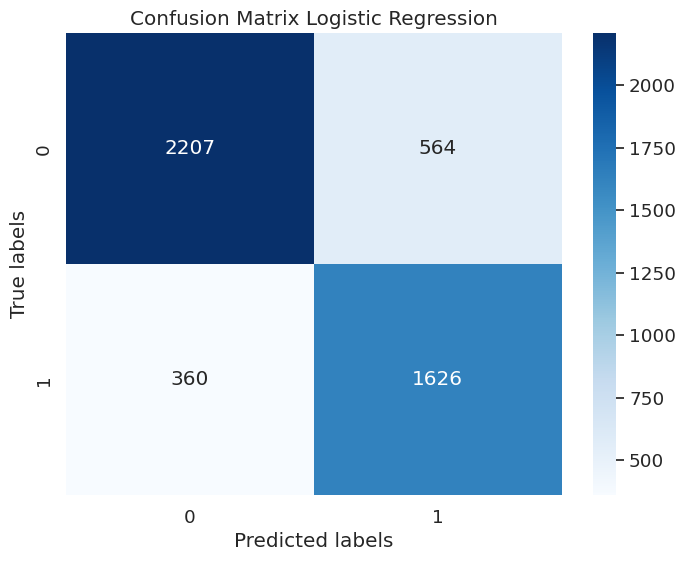

In [ ]:
plot_confusion_matrix(y_train, y_test_pred_lr,[0,1], "Logistic Regression")

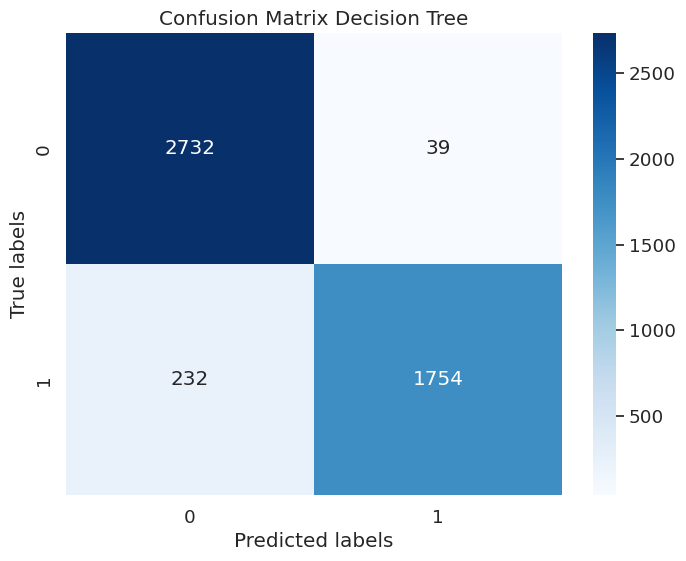

In [ ]:
plot_confusion_matrix(y_train, y_test_pred_dt,[0,1], "Decision Tree")

In [ ]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [ ]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [ ]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 97.16 % +- 0.62

Mean recall: 
 96.05 % +- 1.07

**************** LogisticRegression Model Validation ****************
Mean precision: 
 75.61 % +- 0.9

Mean recall: 
 83.61 % +- 1.24

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 97.93 % +- 0.66

Mean recall: 
 97.53 % +- 0.66



<Axes: >

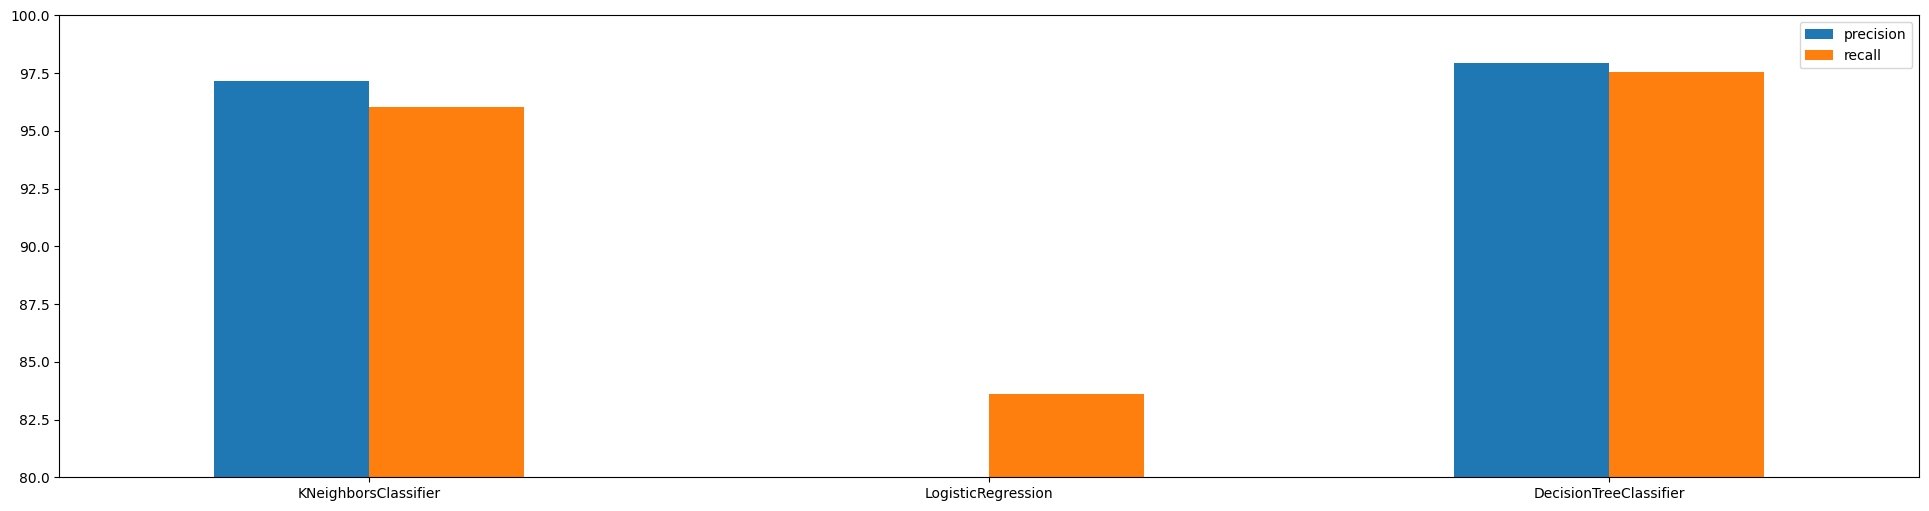

In [ ]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [ ]:
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [ ]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[3765   93]
 [ 118 2788]]
---------------
              precision    recall  f1-score   support

      normal       0.97      0.98      0.97      3858
     anamoly       0.97      0.96      0.96      2906

    accuracy                           0.97      6764
   macro avg       0.97      0.97      0.97      6764
weighted avg       0.97      0.97      0.97      6764

**************** LogisticRegression Model Testing ****************
[[3055  803]
 [ 474 2432]]
----------------
              precision    recall  f1-score   support

      normal       0.87      0.79      0.83      3858
     anamoly       0.75      0.84      0.79      2906

    accuracy                           0.81      6764
   macro avg       0.81      0.81      0.81      6764
weighted avg       0.82      0.81      0.81      6764

************** DecisionTreeClassifier Model Testing **************
[[3811   47]
 [  68 2838]]
--------------
              pr

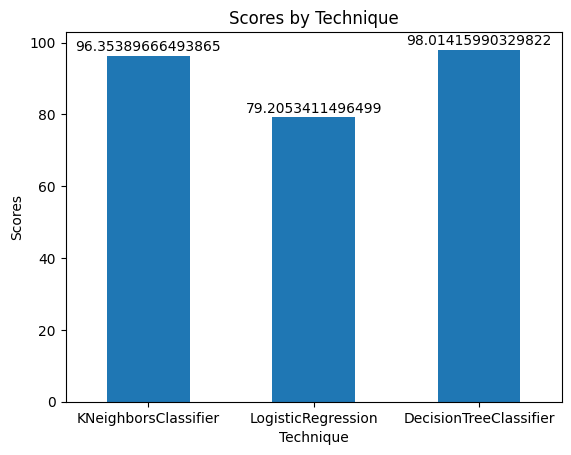

In [ ]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"]) * 100

fig, ax = plt.subplots()

f1s.plot(kind='bar', legend=False, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()-1.5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Technique')
plt.ylabel('Scores')
plt.title('Scores by Technique')
plt.xticks(rotation=0)

plt.show()